In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix  ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [2]:
df=pd.read_csv(r'C:\Users\mwael\OneDrive\Desktop\after_cource\CodeSoft\Bank_Customer_Churn\churn_bank_data\Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x184ee1e51c0>,
 [Text(-0.0024190079981435703, 0.5499946803381874, 'France'),
  Text(-0.3843619393542655, -0.393402973521843, 'Germany'),
  Text(0.3560987901830717, -0.35098953208059164, 'Spain')],
 [Text(-0.002858827634169674, 0.6499937131269488, '50.1%'),
  Text(-0.4542459283277683, -0.46493078688945083, '25.1%'),
  Text(0.42731854821968607, -0.42118743849671, '24.8%')])

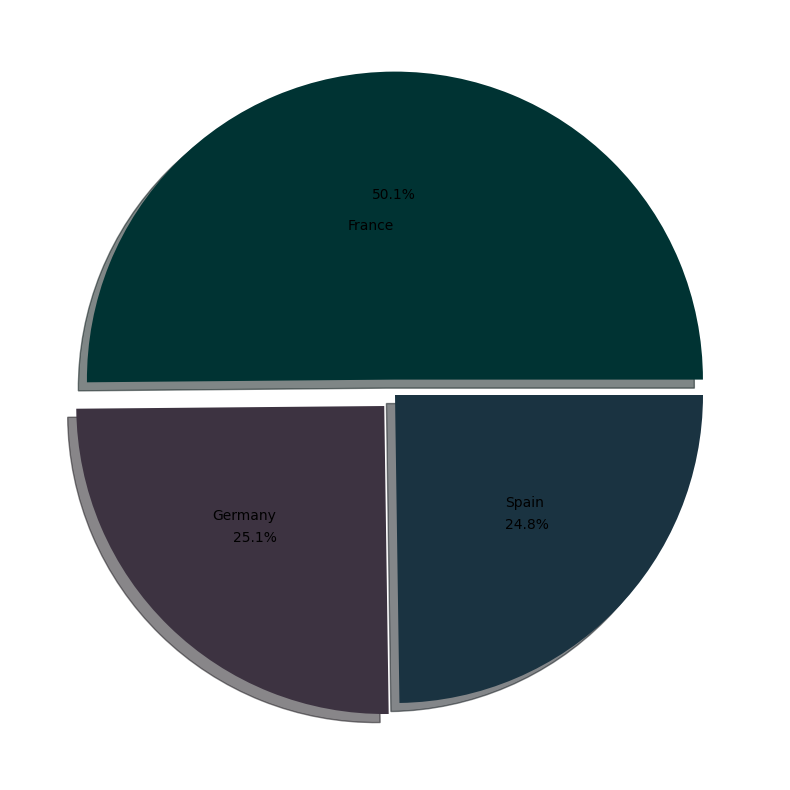

In [8]:
plt.figure(figsize=(10,10))
plt.pie(df['Geography'].value_counts(),
        explode=[0.05,0.05,0],
        colors=[[0.0,0.200,0.200],[0.240,0.200,0.255],[0.100,0.200,0.255]],
        labels=['France','Germany','Spain'],shadow=True,
        autopct="%0.1f%%",labeldistance=0.5)

In [9]:
df['Exited'].isnull().sum()

0

In [10]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [11]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x184ee285370>,
 [Text(-0.4411715713268503, 0.32843210052155053, 'Still'),
  Text(0.40106506484259113, -0.29857463683777324, 'Exited')],
 [Text(-0.5213845842953686, 0.38814702788910516, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

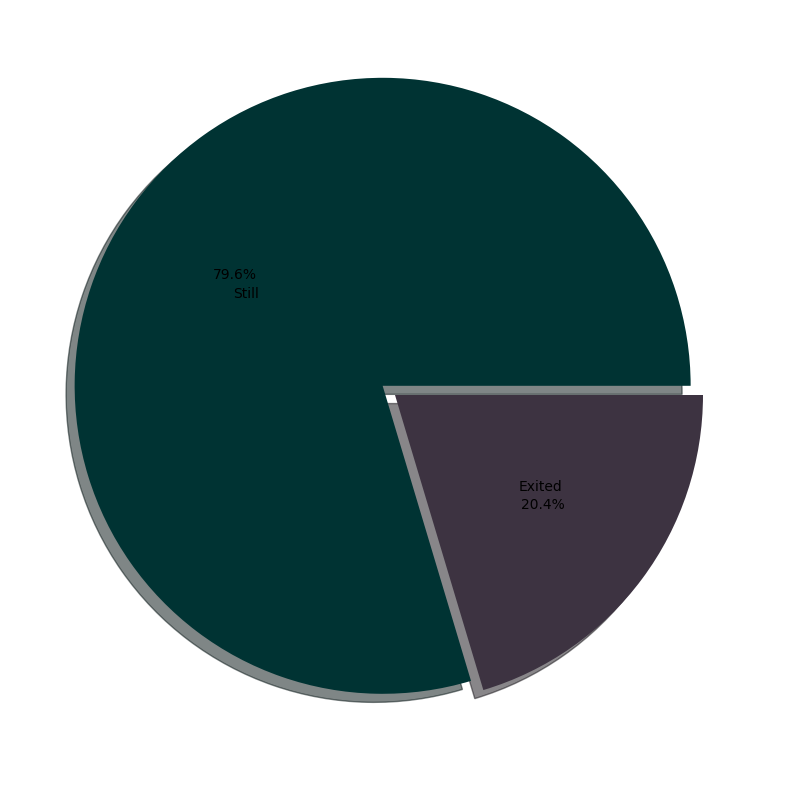

In [12]:
plt.figure(figsize=(10,10))
plt.pie(df['Exited'].value_counts(),
        explode=[0.05,0],
        colors=[[0.0,0.200,0.200],[0.240,0.200,0.255]],
        labels=['Still','Exited'],shadow=True,
        autopct="%0.1f%%",labeldistance=0.5)

<Axes: xlabel='CreditScore', ylabel='Count'>

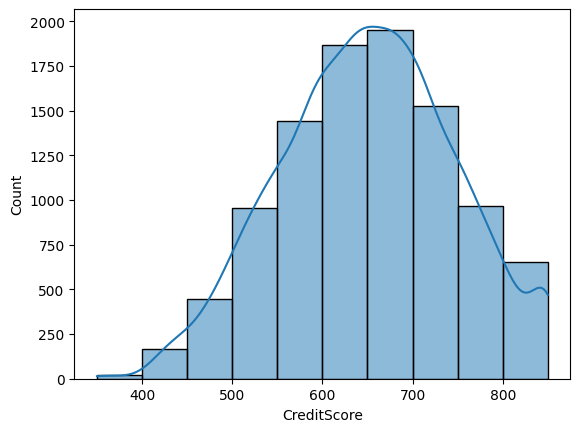

In [13]:
sns.histplot(data=df,x='CreditScore',bins=10,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

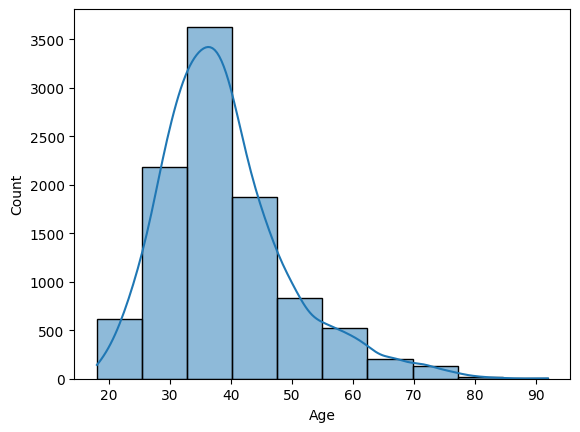

In [14]:
sns.histplot(data=df,x='Age',bins=10,kde=True)

<Axes: xlabel='Exited', ylabel='count'>

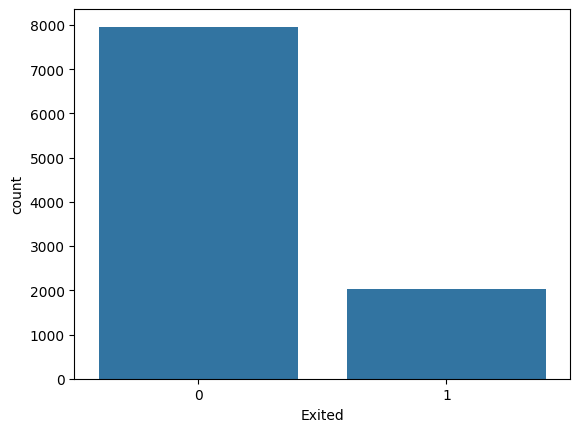

In [15]:
sns.countplot(data=df,x="Exited")

<Axes: xlabel='IsActiveMember', ylabel='count'>

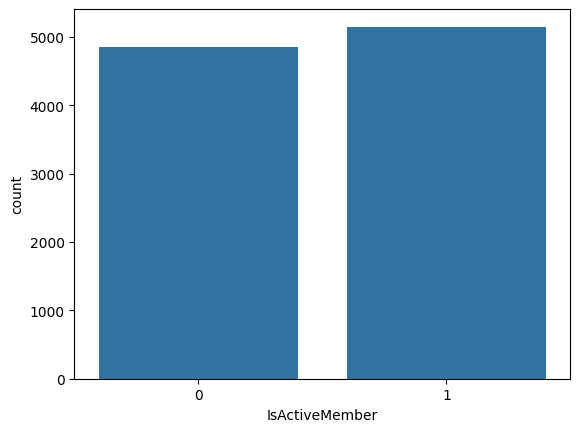

In [16]:
sns.countplot(data=df,x="IsActiveMember")

<Axes: xlabel='Exited', ylabel='Age'>

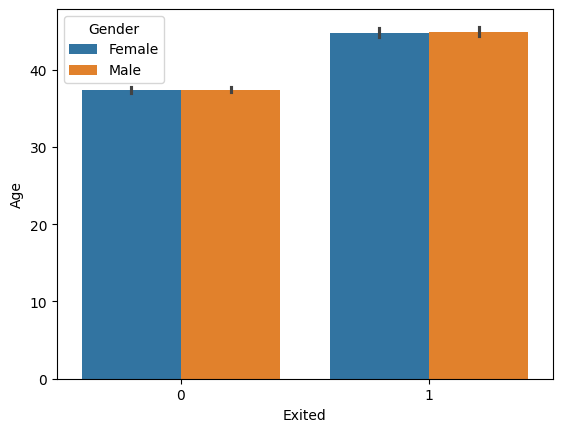

In [17]:
sns.barplot(data=df,x="Exited",y="Age",hue="Gender")

<Axes: xlabel='Exited', ylabel='Balance'>

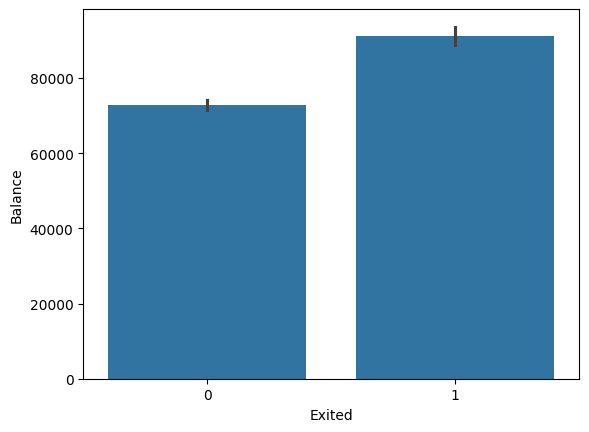

In [18]:
sns.barplot(data=df,x="Exited",y="Balance")

<Axes: xlabel='HasCrCard', ylabel='Balance'>

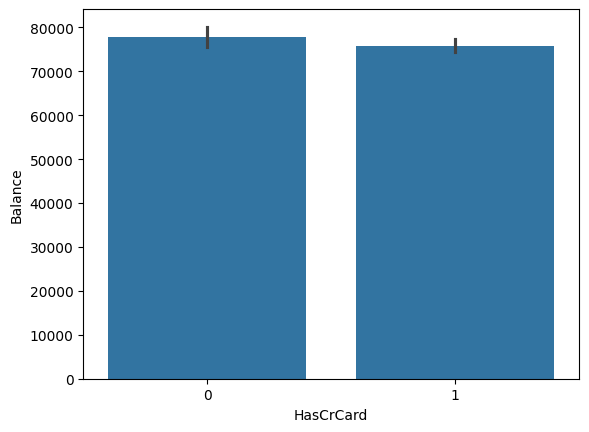

In [19]:
sns.barplot(data=df,x="HasCrCard",y="Balance")

<Axes: xlabel='IsActiveMember', ylabel='Balance'>

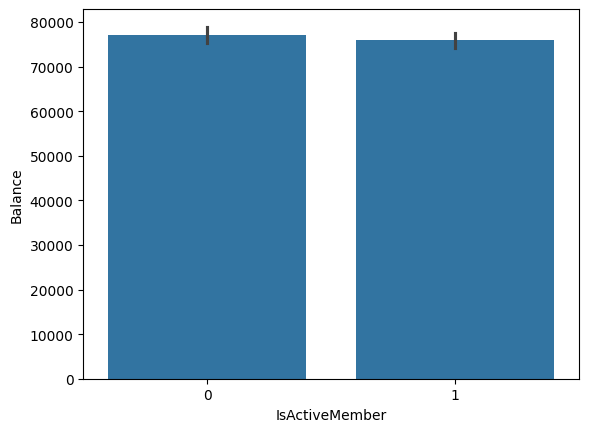

In [20]:
sns.barplot(data=df,x="IsActiveMember",y="Balance")

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

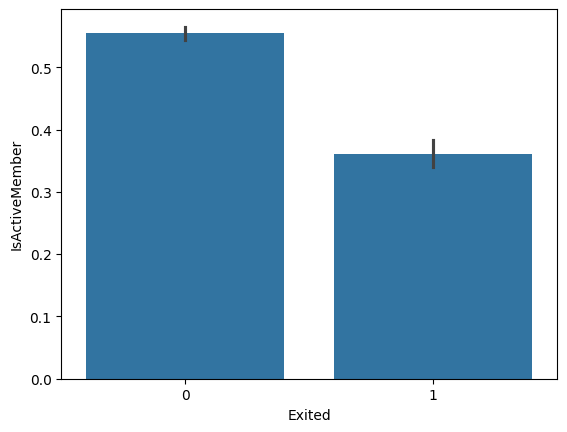

In [21]:
sns.barplot(data=df,x="Exited",y="IsActiveMember")

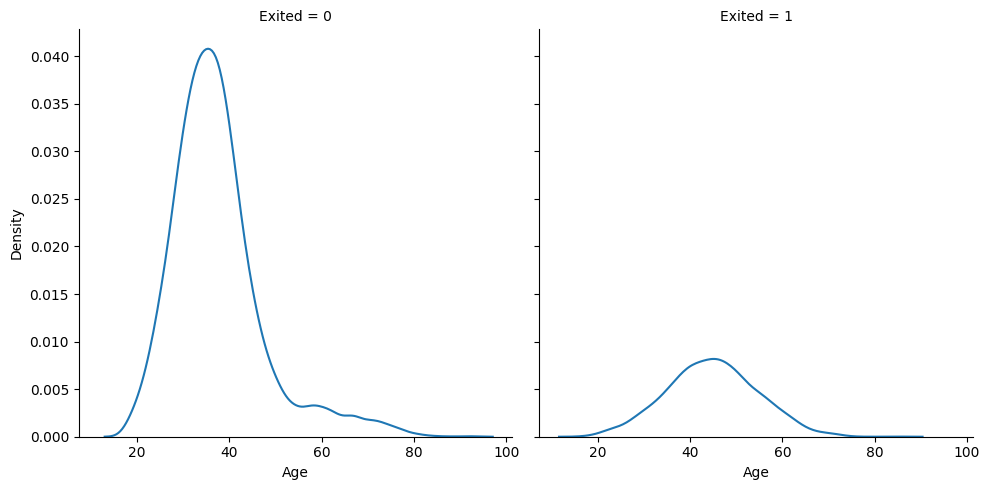

In [22]:
sns.displot(data=df,x="Age",kind="kde",col="Exited")

<Axes: xlabel='CreditScore', ylabel='Density'>

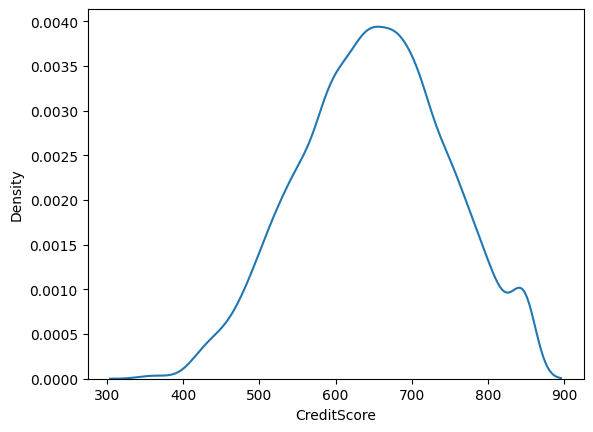

In [23]:
sns.kdeplot(data=df,x="CreditScore")

In [24]:
if 'RowNumber' in df.columns:
    df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head(10)    

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [25]:
encoder=LabelEncoder()
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

df['Geography'],df['Gender']


# Geography = {'France':0,'Spain':2,'Germany':1}
# Gender = {'female':0,'male':1}

(0       0
 1       2
 2       0
 3       0
 4       2
        ..
 9995    0
 9996    0
 9997    0
 9998    1
 9999    0
 Name: Geography, Length: 10000, dtype: int32,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9995    1
 9996    1
 9997    0
 9998    1
 9999    0
 Name: Gender, Length: 10000, dtype: int32)

In [26]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


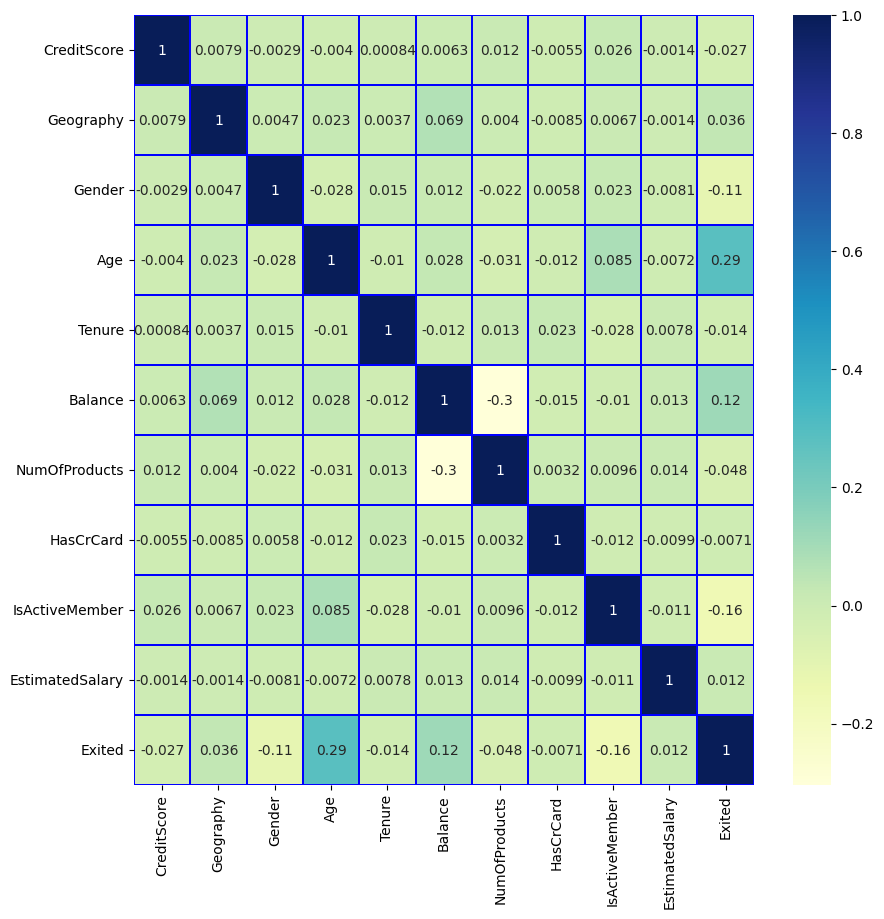

In [27]:
corr_mat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,linecolor='b',linewidths=0.2,cmap='YlGnBu')
plt.show()

In [28]:
x=df.drop(['Exited','Tenure','HasCrCard','EstimatedSalary'],axis=1)
y=df['Exited']

In [29]:
x.shape

(10000, 7)

In [30]:
y.shape

(10000,)

In [31]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [69]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
print('x_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)
print()
print('x_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)


x_train shape : (8000, 7)
y_train shape : (8000,)

x_test shape : (2000, 7)
y_test shape : (2000,)


In [34]:
Model=RandomForestClassifier(max_depth=100)
Model.fit(x_train,y_train)
Model.score(x_test,y_test)

0.8595

In [35]:
Model=SVC()
Model.fit(x_train,y_train)
Model.score(x_test,y_test)

0.8615

In [36]:
Model=LogisticRegression()
Model.fit(x_train,y_train)
Model.score(x_test,y_test)

0.816

In [37]:
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l2

In [58]:
NN_model=Sequential()
NN_model.add(Dense(128, activation='relu', input_shape=(7,)))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='relu'))


NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(64, activation='relu'))


NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(1, activation='sigmoid'))



In [63]:
NN_model.compile(
     loss='binary_crossentropy',
     optimizer=Adam(learning_rate=0.0001),
     metrics=
     [
             'accuracy',
             Precision(name='precision'),
        Recall(name='recall')
        
                             ]
              )
NN_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,249 (270.50 KB)

 Trainable params: 69,249 (270.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
NN_model.fit(x_train,y_train,epochs=50) 

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3125 - precision: 0.7787 - recall: 0.5218
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3035 - precision: 0.7858 - recall: 0.5357
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8712 - loss: 0.3081 - precision: 0.7941 - recall: 0.5307
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.3019 - precision: 0.7831 - recall: 0.5346
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3021 - precision: 0.7852 - recall: 0.5219
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.3083 - precision: 0.7904 - recall: 0.5387
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3098 - precision: 0.7751 - recall: 0.5458
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8731 - loss: 0.2980 - precision: 0.7655 - recall: 0.5490
Epoch 9/50
250/2

In [66]:
test_loss, test_acc, test_precision, test_recall = NN_model.evaluate(x_test, y_test)
print(f"Loss: {test_loss} -- Accuracy: {test_acc} -- Precision: {test_precision} -- Recall: {test_recall}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3784 - precision: 0.6840 - recall: 0.4587 
Loss: 0.39537614583969116 -- Accuracy: 0.8479999899864197 -- Precision: 0.6718146800994873 -- Recall: 0.442748099565506


In [71]:
NN_model.save('Bank_customer_churn.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


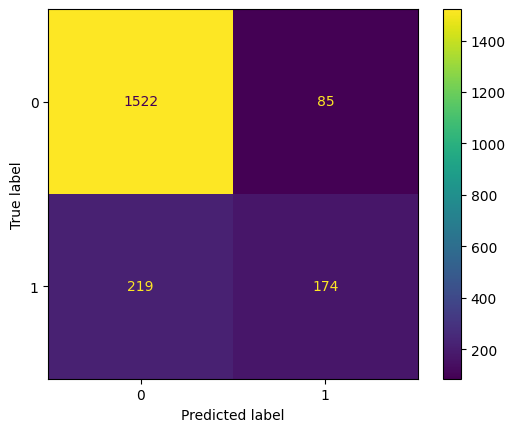

In [68]:

y_pred = NN_model.predict(x_test)

y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()